## Spaceship titanic

### Analiza Zadania
Zadaniem jest przewidziec czy pasażerowie zostali przetransportowani 
Mam do czynienia z uczeniem nadzorowanym w którym wykorzystujemy dane wejsciowe z etykietami aby nauczyc model przewiwywac wynik dla nowych danych
Zadanie to jest przykładem klasyfikacji binarnej która przewiduje jedna z dwóch klas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MOlsz\anaconda3\envs\tf_env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Analiza danych

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/test.csv")
sample_submission = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/sample_submission.csv")

In [3]:
train.sample(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5967,6324_02,Earth,NaN,G/1025/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Murie Hinetthews,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Wnioski z analizy
Dane zawierają 14 kolumn i 8693 wierszy
Dane sa zróznicowane z pod kątem typów:
- 7 kolumn zawiera ty tanych 'object' który moze zawierac dowolna wartosc, pop przejrzeniu przykłądowych danych sa to napisy
- 6 cech to watosci zmienno przecinkowe
- 1 cecha to wartosc boolowska (true/false)

Duzo wartosc jest pustych 

Wartoscii kategoryczne znajduja sie w kolumnach:
- HomePlanet (Earth,Europa,Mars)
- CryoSleep znajduje sie True/False
- Destination (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)
- VIP  znajduje sie True/Flase)

Cecha PassengerId to unikalny identyfikator każdego pasażera. Każdy identyfikator ma formę gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

### Wizualizacja danych

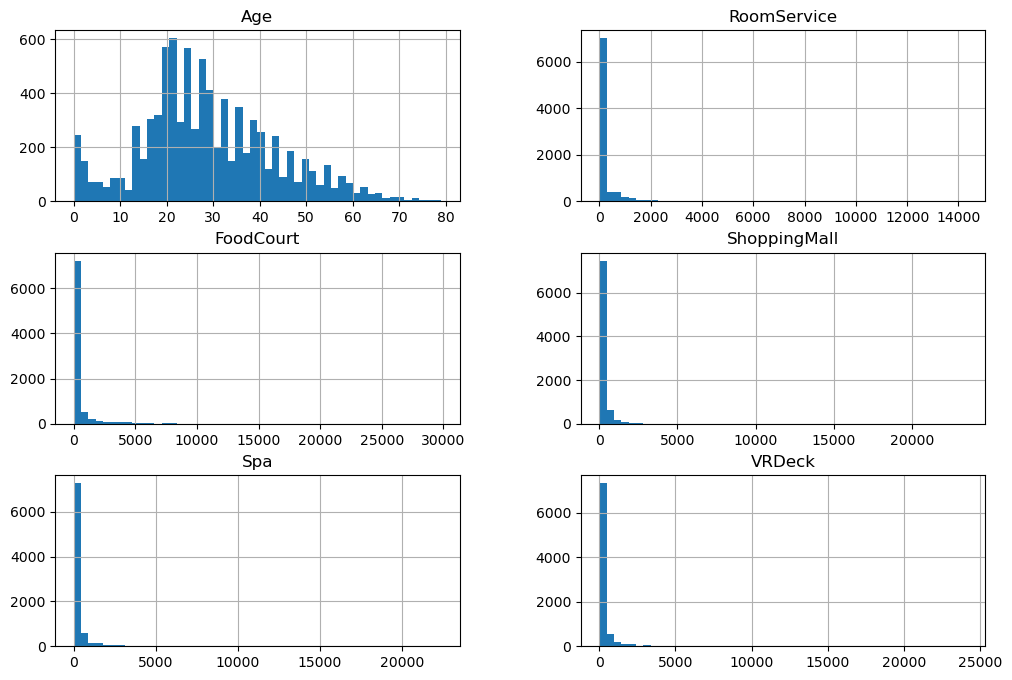

In [8]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

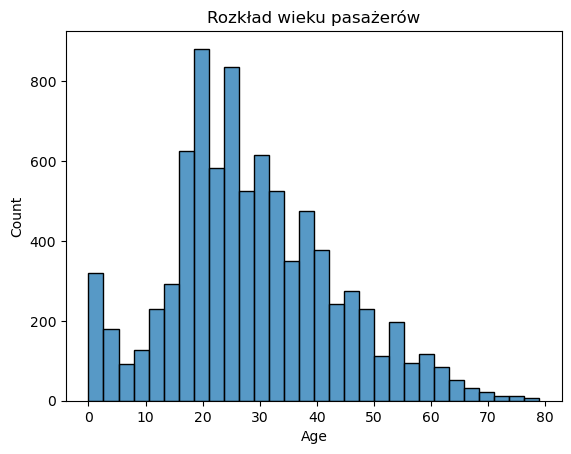

In [9]:
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

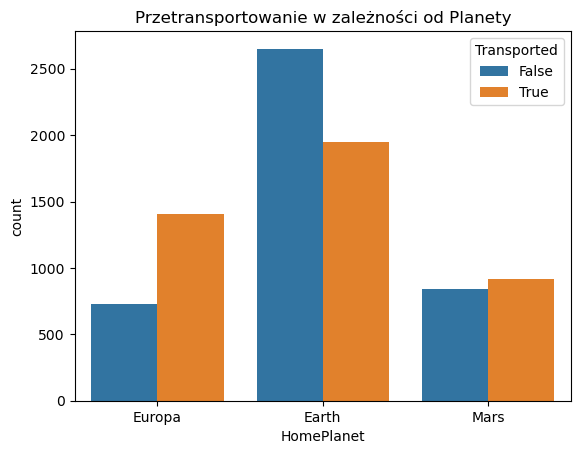

In [10]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

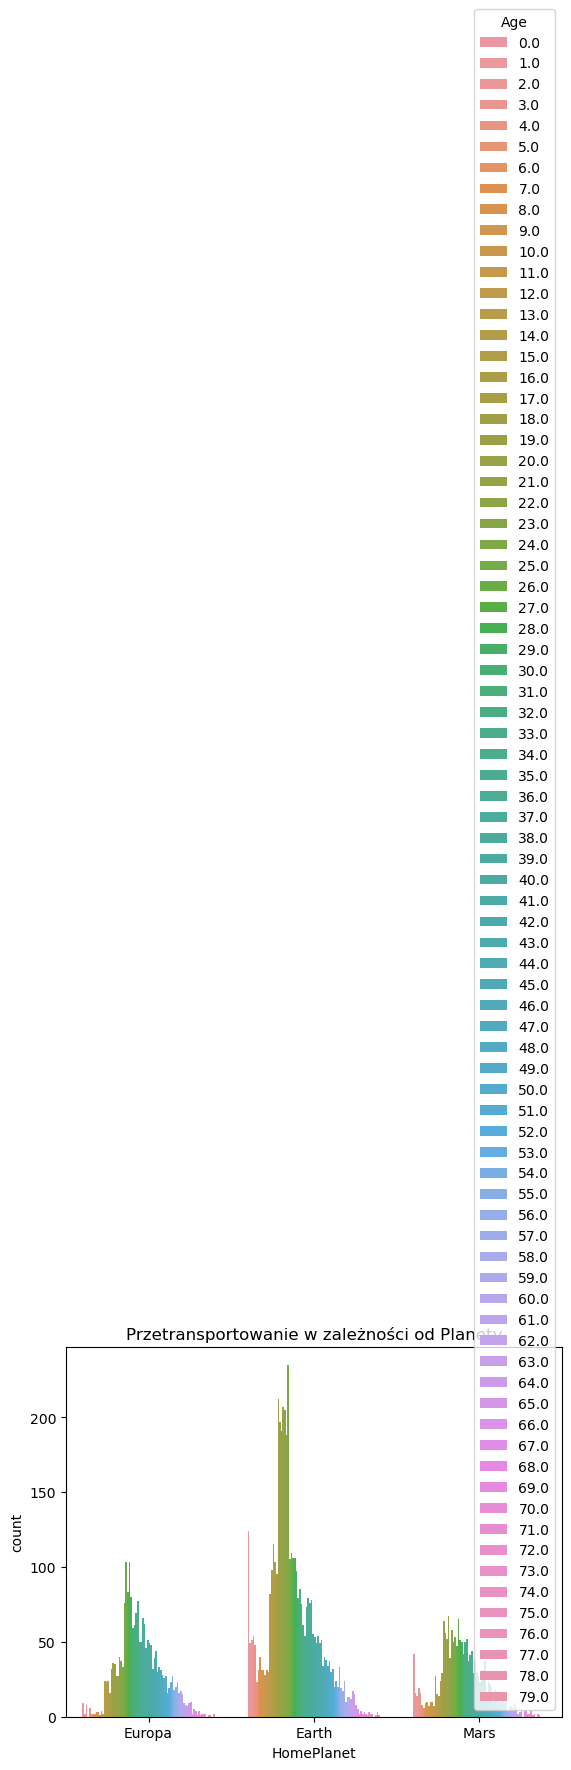

In [11]:
sns.countplot(x='HomePlanet', hue='Age', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

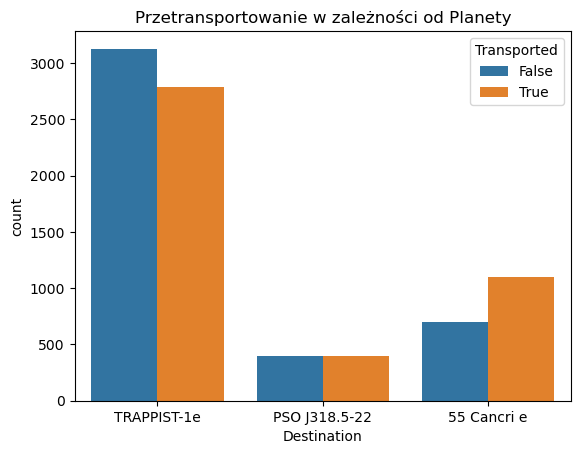

In [12]:
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

### Wnioski z Wizualizacji

### Zamiana danych kategorycznych na numeryczne i wypełnienie danych

Dane które bedzmiemy kowertowac musza byc zmienione dla dataset train i test

Moim plane jest:
- Ceche PassengerId nie trzeba uzupełniac ale rozdzile ja bo sa w niej zawarte grupy
- Ceche CryoSleep - wypełnic puste waartosci danymi z udogodnien na statki poniewa jezeli ktos spi to nie moze wydawac pieniedzy na statku
- Ceche Cabin - rozbije na poszczegolne sektory poniewaz zawartosc to prawdopodobnie pokład/numer kabiny/strona statku(prawa/lewa burta) i wypełnie modą
- Ceche Destination - wypełnie je używajac grup,moim założeniem jest ze pasażerowie z tej samej grupy maja ten sam cel podrózy, a jezeli nie napewno znajduja sie na tym samym pokładzie 
- Ceche Age - wypełnie moda
- Ceche VIP - wypełnie wartośćia False
- Ceche RoomService - wypełnie 0
- Ceche FoodCourt - wypełnie 0
- Ceche ShoppingMall - wypełnie 0
- Ceche Spa - wypełnie 0
- Ceche VRDeck - wypełnie 0
- Ceche Name - usune poniewaz nie beda przydatne  
- Ceche Transported - jest to target

In [13]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
train['GroupID']= train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
test['GroupID']= test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)


In [15]:
train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')


Rozbiłem ceche PassengerId na 2 z której wybiore ilosc osó w grupie i Id grupy, informacje te sa zawarte w teksie na stronie Kaggle


### Uzupełnienie wartosci w kolumnie CryoSleep

Jezeli w kolumnach udogodnien pokładowych jest 0 to oznacza ze osoba spi.

In [16]:
lux = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in lux:
    train[col] = train[col].fillna(0)
    test[col] = train[col].fillna(0)



In [17]:
def sleep(row):
    if row['RoomService'] > 0 : return False
    if row['FoodCourt'] > 0 : return False
    if row['ShoppingMall'] > 0 : return False
    if row['Spa'] > 0 : return False
    if row['VRDeck'] > 0 : return False
    return True

train.loc[train['CryoSleep'].isnull(),'CryoSleep'] = train.apply(sleep, axis = 1)
test.loc[test['CryoSleep'].isnull(),'CryoSleep'] = test.apply(sleep, axis = 1)


In [18]:
train['cabin_first_label'] = train["Cabin"].map(lambda x: x.split("/")[0] if isinstance(x, str) and len(x.split("/")) > 0 else None)
train['cabin_secound_label'] = train["Cabin"].map(lambda x: x.split("/")[1] if isinstance(x, str) and len(x.split("/")) > 1 else None)
train['cabin_third_label'] = train["Cabin"].map(lambda x: x.split("/")[2] if isinstance(x, str) and len(x.split("/")) > 1 else None)


In [19]:
# Grupuje wartosci z Destination według GroupID, jesli wiersz nie jest pusty wybieramy z kazdej grupyid pierwszy element mody w innym przypadku none  
most_common_destination = train.groupby("GroupID")["Destination"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty wypełniam go zmienna wyzej w innym przypadku przepisuje wartosc
train['Destination'] = train.apply(
    lambda row: most_common_destination[row['GroupID']] if pd.isna(row['Destination']) else row['Destination'],
    axis=1
)

# Grupuje wartosci z destination według cabin_first_label jesli nie jest moda pusta to wybierz pierwszy element mody w innym przypadku None
most_common_by_deck = train.groupby('cabin_first_label')['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# jesli wiersz w kolumnie destination jest pusty i jesli wartosc cabin_first_label jest w most_common_by_deck zwraca mode z poprzedniej zmiennej
train['Destination'] = train.apply(lambda row: most_common_by_deck[row['cabin_first_label']] 
                                   if pd.isna(row['Destination']) and row['cabin_first_label'] in most_common_by_deck 
                                   else row['Destination'],axis=1
                                  )


In [20]:
train['is_alone'] = train['GroupID'].map(lambda x: 1 if x == 1 else 0)
test['is_alone'] = test['GroupID'].map(lambda x: 1 if x == 1 else 0)


In [21]:
# Wypełnianie brakujących wartości dla zmiennych kategorycznych
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('-1')
train['cabin_first_label'] = train['cabin_first_label'].fillna(train['cabin_first_label'].mode()[0])
train['cabin_secound_label'] = train['cabin_secound_label'].fillna(train['cabin_secound_label'].mode()[0])
train['cabin_third_label']  = train['cabin_third_label'] .fillna(train['cabin_third_label'].mode()[0])


train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])

test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['VIP'] = test['VIP'].fillna(False)

test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])

# Wypełnianie brakujących wartości dla zmiennej 'Age'
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [22]:
cabin_first_label_dict = {
    'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8
}
train['cabin_first_label'] = train['cabin_first_label'].map(cabin_first_label_dict)

In [23]:
cabin_third_label_dict = {'S':1,'P':2}
train['cabin_third_label'] = train['cabin_third_label'].map(cabin_third_label_dict)

In [24]:
train['cabin_secound_label'] = train['cabin_secound_label'].astype('int') 

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

categorial_col = ['HomePlanet', 'Destination','CryoSleep','VIP' ]

train['Transported'] = le.fit_transform(train['Transported'])

for col in categorial_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    



In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          8693 non-null   object 
 1   HomePlanet           8693 non-null   int32  
 2   CryoSleep            8693 non-null   int32  
 3   Cabin                8693 non-null   object 
 4   Destination          8693 non-null   int32  
 5   Age                  8693 non-null   float64
 6   VIP                  8693 non-null   int32  
 7   RoomService          8693 non-null   float64
 8   FoodCourt            8693 non-null   float64
 9   ShoppingMall         8693 non-null   float64
 10  Spa                  8693 non-null   float64
 11  VRDeck               8693 non-null   float64
 12  Name                 8493 non-null   object 
 13  Transported          8693 non-null   int64  
 14  GroupID              8693 non-null   int32  
 15  GroupSize            8693 non-null   i

### Tworzenie Modelu

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score

X  = train.drop(['Cabin','Name','PassengerId','Transported'], axis = 1)
y = train['Transported']

cross_val_score(DummyClassifier(strategy='stratified', random_state=42),X,y, cv = 5).mean()

0.49453589916827195

In [28]:
X.isnull().sum()

HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
GroupID                0
GroupSize              0
cabin_first_label      0
cabin_secound_label    0
cabin_third_label      0
is_alone               0
dtype: int64

In [29]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.6909153111684757

In [31]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.7419797365124594

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state = 42)

accuracies = []
                      
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val,y_pred)
    accuracies.append(accuracy)
    
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')


Średnia dokładność: 0.7975


In [35]:
import xgboost as xgb

accuracies_xgb = []

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tworzymy model (Random Forest w tym przypadku)
    xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.01
)

    
    # Trenowanie modelu
    xgb_model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = xgb_model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    accuracies_xgb.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(accuracies_xgb)/len(accuracies_xgb):.4f}')

Średnia dokładność: 0.8073


In [36]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    xgb_model = xgb.XGBClassifier(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

print("Najlepsze parametry:", random_search.best_params_)
print("Najlepsza dokładność:", random_search.best_score_)


Najlepsze parametry: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Najlepsza dokładność: 0.7752695902228612


In [41]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import lightgbm as lgb

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10, None],  # Dodano brak limitu głębokości
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Inicjalizacja modelu LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# RandomizedSearchCV na całym zbiorze treningowym
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=30,  # Można zmniejszyć dla szybszych wyników
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Trenowanie RandomizedSearchCV
random_search.fit(X, y)

print("Najlepsze parametry:", random_search.best_params_)
print("Najlepsza dokładność:", random_search.best_score_)


[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
Najlepsze parametry: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Najlepsza dokładność: 0.8093872978332983


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definiujemy siatkę parametrów
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV dla szybszego przeszukiwania
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # liczba prób dla RandomizedSearchCV
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Trenowanie RandomizedSearchCV
random_search.fit(X, y)

print("Najlepsze parametry:", random_search.best_params_)
print("Najlepsza dokładność:", random_search.best_score_)

C:\Users\MOlsz\anaconda3\envs\tf_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Najlepsze parametry: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
Najlepsza dokładność: 0.7720033404116358


In [43]:
import catboost as ctb

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10, None],  # Dodano brak limitu głębokości
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Inicjalizacja modelu LightGBM
ctb_model = ctb.CatBoostClassifier(random_state=42)

# RandomizedSearchCV na całym zbiorze treningowym
random_search = RandomizedSearchCV(
    estimator=ctb_model,
    param_distributions=param_grid,
    n_iter=30,  # Można zmniejszyć dla szybszych wyników
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

# Trenowanie RandomizedSearchCV
random_search.fit(X, y)

print("Najlepsze parametry:", random_search.best_params_)
print("Najlepsza dokładność:", random_search.best_score_)


ModuleNotFoundError: No module named 'catboost'